<h1>Emotion detection</h1>

In [1]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
import seaborn as sns

<h2>CKPLUS and Emotion Detection dataset</h2>

The sources of the datasets: <br> https://www.kaggle.com/datasets/shawon10/ckplus <br> https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer

In [2]:
image_ck = []
emotions = []
emotionsstr = []
"""
#Angry
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/Emotion Detection/test/angry"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("0")
    emotionsstr.append("angry") 
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/Emotion Detection/train/angry"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("0")
    emotionsstr.append("angry") 
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/CKPLUS/CK+48/anger"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("0")
    emotionsstr.append("angry") """
"""#Fearful
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/Emotion Detection/test/fearful"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("1")
    emotionsstr.append("fearful") 
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/Emotion Detection/train/fearful"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("1")
    emotionsstr.append("fearful") 
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/CKPLUS/CK+48/fear"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("1")
    emotionsstr.append("fearful") """
#Happy
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/Emotion Detection/test/happy"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("0")
    emotionsstr.append("happy") 
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/Emotion Detection/train/happy"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("0")
    emotionsstr.append("happy")
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/CKPLUS/CK+48/happy"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("0")
    emotionsstr.append("happy")
#Neural
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/Emotion Detection/test/neutral"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("1")
    emotionsstr.append("neural") 
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/Emotion Detection/train/neutral"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("1")
    emotionsstr.append("neural")
#Sad
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/Emotion Detection/test/sad"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("2")
    emotionsstr.append("sad") 
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/Emotion Detection/train/sad"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("2")
    emotionsstr.append("sad")
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/CKPLUS/CK+48/sadness"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("2")
    emotionsstr.append("sad") 
"""
#Surprised
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/Emotion Detection/test/surprised"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("5")
    emotionsstr.append("surprised") 
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/Emotion Detection/train/surprised"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("5")
    emotionsstr.append("surprised")
folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/CKPLUS/CK+48/surprise"
for filename in os.listdir(folder):
    image_ck.append(folder + "/" + filename)
    emotions.append("5")
    emotionsstr.append("surprised")"""

'\n#Surprised\nfolder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/Emotion Detection/test/surprised"\nfor filename in os.listdir(folder):\n    image_ck.append(folder + "/" + filename)\n    emotions.append("5")\n    emotionsstr.append("surprised") \nfolder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/Emotion Detection/train/surprised"\nfor filename in os.listdir(folder):\n    image_ck.append(folder + "/" + filename)\n    emotions.append("5")\n    emotionsstr.append("surprised")\nfolder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/CKPLUS/CK+48/surprise"\nfor filename in os.listdir(folder):\n    image_ck.append(folder + "/" + filename)\n    emotions.append("5")\n    emotionsstr.append("surprised")'

In [3]:
image_ck=pd.Series(image_ck,name='Filename')
emotions=pd.Series(emotions,name='Emotion')
emotionsstr=pd.Series(emotionsstr,name='Emotion_str')
df_ck=pd.concat([image_ck,emotions,emotionsstr],axis=1)
df_ck.head(20)

,Filename,Emotion,Emotion_str
0,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0,happy
1,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0,happy
2,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0,happy
3,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0,happy
4,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0,happy
5,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0,happy
6,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0,happy
7,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0,happy
8,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0,happy
9,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0,happy


In [4]:
df_ck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21555 entries, 0 to 21554
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Filename     21555 non-null  object
 1   Emotion      21555 non-null  object
 2   Emotion_str  21555 non-null  object
dtypes: object(3)
memory usage: 505.3+ KB


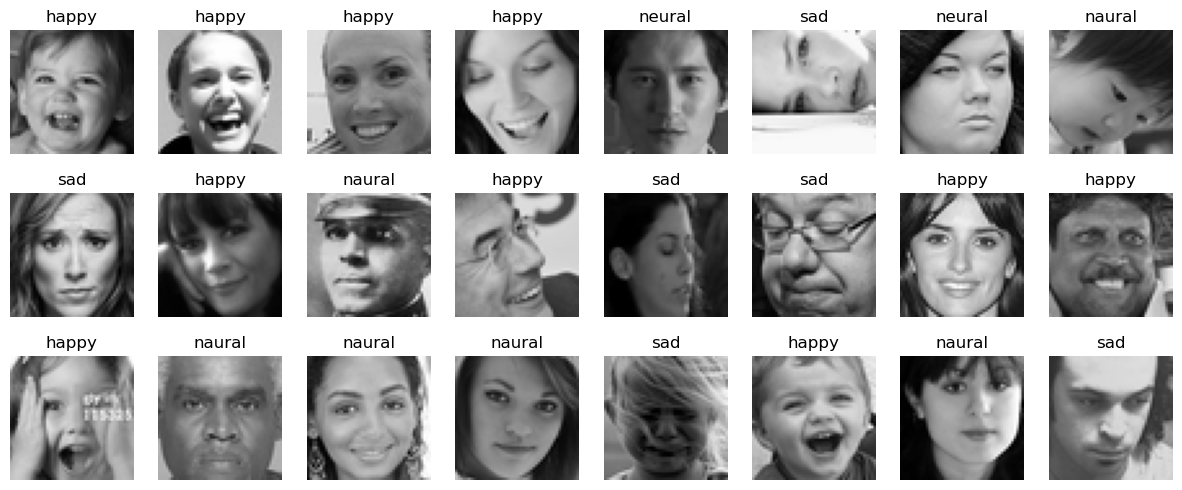

In [5]:

fig=plt.figure(figsize=(15,6))
for i in range(24):
    fig.add_subplot(3,8,i+1)
    x = random.randint(0,21554)
    img = cv2.cvtColor((cv2.imread(df_ck.iloc[x]['Filename'])), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
    label = df_ck.iloc[x]['Emotion_str']
    
    plt.title(label)
    plt.axis('off')
    
plt.show()

In [6]:
train1_images, val_images, train1_labels, val_labels = train_test_split(df_ck['Filename'], df_ck['Emotion'], test_size=0.2, shuffle=True)

In [7]:
d = {'filename':train1_images,'emotion':train1_labels}
train_1 = pd.concat(d,axis=1)
train_1

,filename,emotion
9148,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0
1220,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0
21158,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,2
67,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0
8005,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0
...,...,...
3115,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0
9450,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,1
18877,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,2
2934,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0


In [8]:
d = {'filename':val_images,'emotion':val_labels}
val = pd.concat(d,axis=1)
val

,filename,emotion
18645,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,2
21342,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,2
9735,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,1
9510,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,1
18511,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,2
...,...,...
18678,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,2
8224,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0
18718,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,2
11385,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,1


In [9]:
train_images, test_images, train_labels, test_labels = train_test_split(train1_images, train1_labels, test_size=0.2, shuffle=True)

In [10]:
d = {'filename':test_images,'emotion':test_labels}
test = pd.concat(d,axis=1)
test

,filename,emotion
9554,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,1
16847,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,2
2935,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0
16792,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,2
10191,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,1
...,...,...
13601,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,1
2477,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0
15052,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,1
7976,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0


In [11]:
d = {'filename':train_images,'emotion':train_labels}
train = pd.concat(d,axis=1)
train

,filename,emotion
16580,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,2
9076,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0
20329,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,2
19004,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,2
9475,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,1
...,...,...
1077,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0
5749,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,0
16565,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,2
19991,C:/Users/gyory/Documents/Diplomamunka/Adathalm...,2


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_gen = ImageDataGenerator(rescale=1./255,
                               #rotation_range = 20,
                               #width_shift_range=0.9,
                               #height_shift_range=0.9,
                               #shear_range=0.2
                               #horizontal_flip=True
                               #brightness_range = [0.8,1.2]
                              )
                               
test_gen = ImageDataGenerator(rescale=1./255)

In [14]:
train_data = train_gen.flow_from_dataframe(dataframe = train,
                                           directory = None,
                                           x_col = 'filename',
                                           y_col = 'emotion',
                                           batch_size = 32,
                                           shuffle = True,
                                           class_mode = 'categorical',
                                           target_size = (48,48),
                                           color_mode = 'grayscale'
)

val_data = test_gen.flow_from_dataframe(dataframe = val,
                                           directory = None,
                                           x_col = 'filename',
                                           y_col = 'emotion',
                                           batch_size = 32,
                                           shuffle = True,
                                        color_mode = 'grayscale',
                                           class_mode = 'categorical',
                                           target_size = (48,48)
)

test_data = test_gen.flow_from_dataframe(dataframe = test,
                                           directory = None,
                                           x_col = 'filename',
                                           y_col = 'emotion',
                                           batch_size = 32,
                                           shuffle = False,
                                            color_mode = 'grayscale',
                                           class_mode = 'categorical',
                                           target_size = (48,48)
)


Found 13795 validated image filenames belonging to 3 classes.
Found 4311 validated image filenames belonging to 3 classes.
Found 3449 validated image filenames belonging to 3 classes.


<h2>MODELL</h2>

In [15]:
from keras import models
import tensorflow as tf
from tensorflow.keras import layers

In [16]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 48, 48, 1)
(32, 3)


In [17]:
network_emotion3 = models.Sequential()
network_emotion3.add(layers.Conv2D(36, kernel_size=3, activation='relu', input_shape=(48,48,1)))
network_emotion3.add(layers.MaxPool2D(pool_size=3, strides=1))
network_emotion3.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
network_emotion3.add(layers.MaxPool2D(pool_size=3, strides=1))
network_emotion3.add(layers.Conv2D(128, kernel_size=3, activation='relu'))
network_emotion3.add(layers.MaxPool2D(pool_size=3, strides=1))
network_emotion3.add(layers.Conv2D(256, kernel_size=3, activation='relu'))
network_emotion3.add(layers.MaxPool2D(pool_size=3, strides=1))
network_emotion3.add(layers.Conv2D(512, kernel_size=3, activation='relu'))
network_emotion3.add(layers.MaxPool2D(pool_size=3, strides=1))
network_emotion3.add(layers.Flatten())
network_emotion3.add(layers.Dropout(0.6))
network_emotion3.add(layers.Dense(128, activation='relu'))
network_emotion3.add(layers.Dense(3, activation='softmax'))

In [18]:
network_emotion3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [19]:
history3 = network_emotion3.fit(
    train_data,
    validation_data=val_data,
    epochs= 20,
)
eff_epochs = len(history3.history['loss'])

Epoch 1/20
432/432 [==============================] - 1154s 3s/step - loss: 1.0408 - accuracy: 0.4725 - val_loss: 0.9125 - val_accuracy: 0.5495
Epoch 2/20
432/432 [==============================] - 1164s 3s/step - loss: 0.8773 - accuracy: 0.5727 - val_loss: 0.8764 - val_accuracy: 0.5644
Epoch 3/20
432/432 [==============================] - 1141s 3s/step - loss: 0.8242 - accuracy: 0.6046 - val_loss: 0.8217 - val_accuracy: 0.6149
Epoch 4/20
432/432 [==============================] - 1132s 3s/step - loss: 0.8036 - accuracy: 0.6201 - val_loss: 0.8659 - val_accuracy: 0.5672
Epoch 5/20
432/432 [==============================] - 1129s 3s/step - loss: 0.7730 - accuracy: 0.6346 - val_loss: 0.7990 - val_accuracy: 0.6050
Epoch 6/20
432/432 [==============================] - 1124s 3s/step - loss: 0.7429 - accuracy: 0.6579 - val_loss: 0.7509 - val_accuracy: 0.6363
Epoch 7/20
432/432 [==============================] - 1131s 3s/step - loss: 0.7260 - accuracy: 0.6655 - val_loss: 0.7339 - val_accuracy:

In [20]:
network_emotion1.save('C:/Users/gyory/Documents/Diplomamunka/modells/network_emotion8.keras')

In [21]:
network_emotion1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 36)        360       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 44, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 36, 36, 128)      0

In [22]:
len(test_images)

3449

In [23]:
len(test_labels)

3449

In [24]:
test_loss, test_acc = network_emotion1.evaluate(test_data)

108/108 [==============================] - 58s 540ms/step - loss: 0.7773 - accuracy: 0.6819


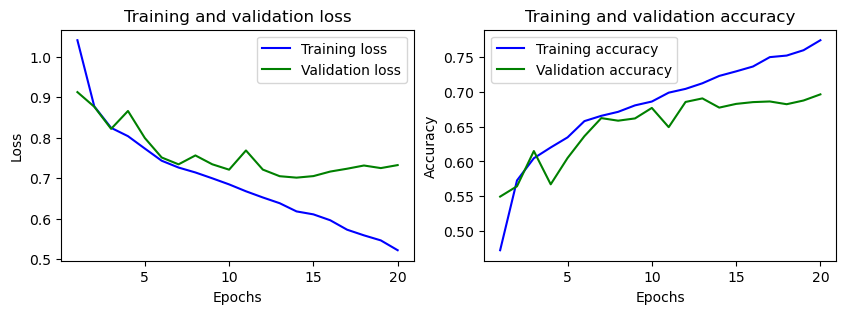

In [25]:
plt.figure(figsize=[10,3])
plt.subplot(121); 

loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122); 

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy' )
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [26]:
test_pred = network_emotion1.predict(test_data)

108/108 [==============================] - 58s 531ms/step


In [27]:
test_pred_bool = np.argmax(test_pred, axis=1)
test_pred_bool

array([1, 2, 0, ..., 1, 1, 2], dtype=int64)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(test_data.classes,test_pred_bool,target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1435
           1       0.62      0.55      0.59      1024
           2       0.56      0.65      0.60       990

    accuracy                           0.68      3449
   macro avg       0.67      0.67      0.67      3449
weighted avg       0.69      0.68      0.68      3449



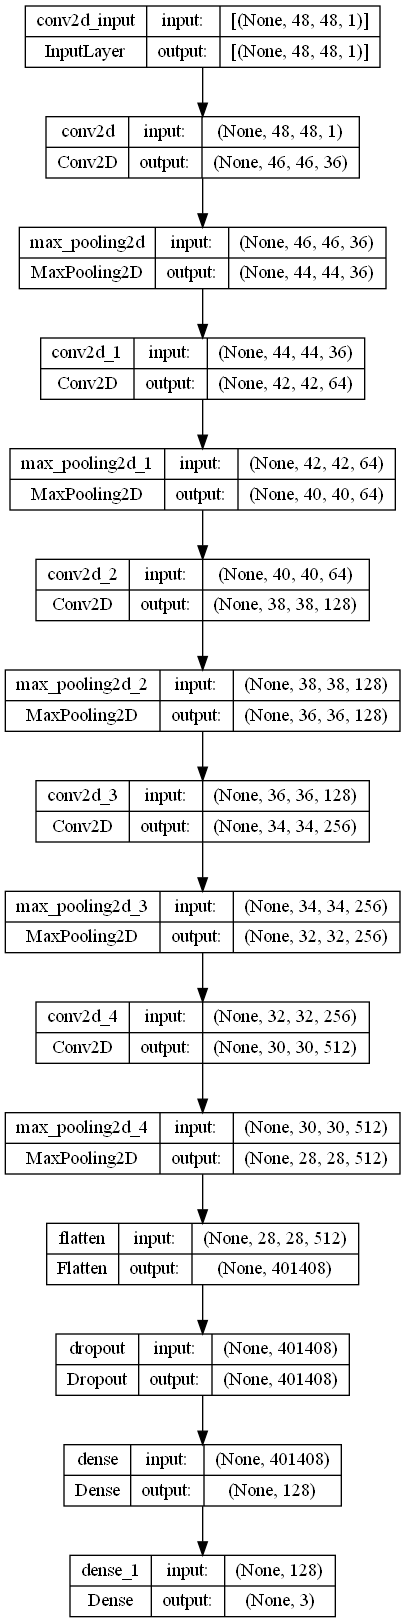

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(network_emotion1, show_shapes = True, to_file='C:/Users/gyory/Documents/Diplomamunka/modells/network_gender3.png')